# Departamento de Vendas

- Base de dados: https://www.kaggle.com/c/rossmann-store-sales/data

## Dados

- `Id`: an Id that represents a (Store, Date) duple within the test set
- `Store`: a unique Id for each store
- `Sales`: the turnover for any given day (this is what you are predicting)
- `Customers`: the number of customers on a given day **Vendas por dia - objetivo**
- `Open`: an indicator for whether the store was open: 0 = closed, 1 = open
- `StateHoliday`: indicates a state holiday. Normally all stores, with few exceptions, are closed on state holidays. Note that all schools are closed on public holidays and weekends. a = public holiday, b = Easter holiday, c = Christmas, 0 = None
- `SchoolHoliday`: indicates if the (Store, Date) was affected by the closure of public schools
- `StoreType`: differentiates between 4 different store models: a, b, c, d
- `Assortment`: describes an assortment level`: a = basic, b = extra, c = extended
- `CompetitionDistance`: distance in meters to the nearest competitor store
- `CompetitionOpenSinc`e[Month/Year]: gives the approximate year and month of the time the nearest competitor was opened
- `Promo`: indicates whether a store is running a promo on that day
- `Promo2`: Promo2 is a continuing and consecutive promotion for some stores`: 0 = store is not participating, 1 = store is participating
- `Promo2Since[Year/Week]`: describes the year and calendar week when the store started participating in Promo2
- `PromoInterval`: describes the consecutive intervals Promo2 is started, naming the months the promotion is started anew. E.g. "Feb,May,Aug,Nov" means each round starts in February, May, August, November of any given year for that store


# Bibliotecas

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Google Drive Connect

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


# DataFrame de Vendas

In [3]:
sales_train_df = pd.read_csv('/content/gdrive/MyDrive/datas/dv/train.csv')
print(sales_train_df.shape)

(1017209, 9)


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (7) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [4]:
sales_train_df.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


- Verificando os dados sobre os dias da semana

In [5]:
sales_train_df['DayOfWeek'].unique()

array([5, 4, 3, 2, 1, 7, 6])

- Verificando os dados sobre o status da loja, se aberta ou fechada.

In [6]:
sales_train_df['Open'].unique()

array([1, 0])

- Verificando os dados sobre a loja ter ou não uma promoção.

In [7]:
sales_train_df['Promo'].unique()

array([1, 0])

- Verificando os tipos de feriados do estado possíveis. 

In [8]:
sales_train_df['StateHoliday'].unique()

array(['0', 'a', 'b', 'c', 0], dtype=object)

- Verificando os tipos de dados possíveis para a existência ou não de feriado escolar.

In [9]:
sales_train_df['SchoolHoliday'].unique()

array([1, 0])

- Visualizando o dataframe

In [10]:
sales_train_df.tail()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
1017204,1111,2,2013-01-01,0,0,0,0,a,1
1017205,1112,2,2013-01-01,0,0,0,0,a,1
1017206,1113,2,2013-01-01,0,0,0,0,a,1
1017207,1114,2,2013-01-01,0,0,0,0,a,1
1017208,1115,2,2013-01-01,0,0,0,0,a,1


In [11]:
sales_train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 9 columns):
 #   Column         Non-Null Count    Dtype 
---  ------         --------------    ----- 
 0   Store          1017209 non-null  int64 
 1   DayOfWeek      1017209 non-null  int64 
 2   Date           1017209 non-null  object
 3   Sales          1017209 non-null  int64 
 4   Customers      1017209 non-null  int64 
 5   Open           1017209 non-null  int64 
 6   Promo          1017209 non-null  int64 
 7   StateHoliday   1017209 non-null  object
 8   SchoolHoliday  1017209 non-null  int64 
dtypes: int64(7), object(2)
memory usage: 69.8+ MB


## Sumário estatístico

In [12]:
sales_train_df.describe()

,Store,DayOfWeek,Sales,Customers,Open,Promo,SchoolHoliday
count,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06
mean,5.584297e+02,3.998341e+00,5.773819e+03,6.331459e+02,8.301067e-01,3.815145e-01,1.786467e-01
std,3.219087e+02,1.997391e+00,3.849926e+03,4.644117e+02,3.755392e-01,4.857586e-01,3.830564e-01
min,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.800000e+02,2.000000e+00,3.727000e+03,4.050000e+02,1.000000e+00,0.000000e+00,0.000000e+00
50%,5.580000e+02,4.000000e+00,5.744000e+03,6.090000e+02,1.000000e+00,0.000000e+00,0.000000e+00
75%,8.380000e+02,6.000000e+00,7.856000e+03,8.370000e+02,1.000000e+00,1.000000e+00,0.000000e+00
max,1.115000e+03,7.000000e+00,4.155100e+04,7.388000e+03,1.000000e+00,1.000000e+00,1.000000e+00


# Dataframe das Lojas

In [13]:
store_df = pd.read_csv('/content/gdrive/MyDrive/datas/dv/store.csv')
print(store_df.shape)

(1115, 10)


In [15]:
store_df.head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


In [14]:
store_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1115 entries, 0 to 1114
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Store                      1115 non-null   int64  
 1   StoreType                  1115 non-null   object 
 2   Assortment                 1115 non-null   object 
 3   CompetitionDistance        1112 non-null   float64
 4   CompetitionOpenSinceMonth  761 non-null    float64
 5   CompetitionOpenSinceYear   761 non-null    float64
 6   Promo2                     1115 non-null   int64  
 7   Promo2SinceWeek            571 non-null    float64
 8   Promo2SinceYear            571 non-null    float64
 9   PromoInterval              571 non-null    object 
dtypes: float64(5), int64(2), object(3)
memory usage: 87.2+ KB


## Sumário estatístico

In [16]:
store_df.describe()

,Store,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear
count,1115.00000,1112.000000,761.000000,761.000000,1115.000000,571.000000,571.000000
mean,558.00000,5404.901079,7.224704,2008.668857,0.512108,23.595447,2011.763573
std,322.01708,7663.174720,3.212348,6.195983,0.500078,14.141984,1.674935
min,1.00000,20.000000,1.000000,1900.000000,0.000000,1.000000,2009.000000
25%,279.50000,717.500000,4.000000,2006.000000,0.000000,13.000000,2011.000000
50%,558.00000,2325.000000,8.000000,2010.000000,1.000000,22.000000,2012.000000
75%,836.50000,6882.500000,10.000000,2013.000000,1.000000,37.000000,2013.000000
max,1115.00000,75860.000000,12.000000,2015.000000,1.000000,50.000000,2015.000000


# Tratamento e Exploração de dados


## Dataframe de Vendas

### Dados Nulos

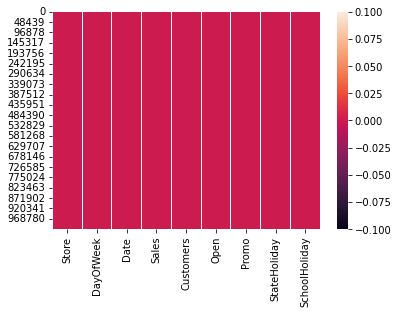

In [17]:
sns.heatmap(sales_train_df.isnull());

In [ ]:
sales_train_df.isnull().sum()

Store            0
DayOfWeek        0
Date             0
Sales            0
Customers        0
Open             0
Promo            0
StateHoliday     0
SchoolHoliday    0
dtype: int64

- O dataframe não possui dados nulos/faltantes em suas linhas ou colunas.

### Histograma de dados por quantidade

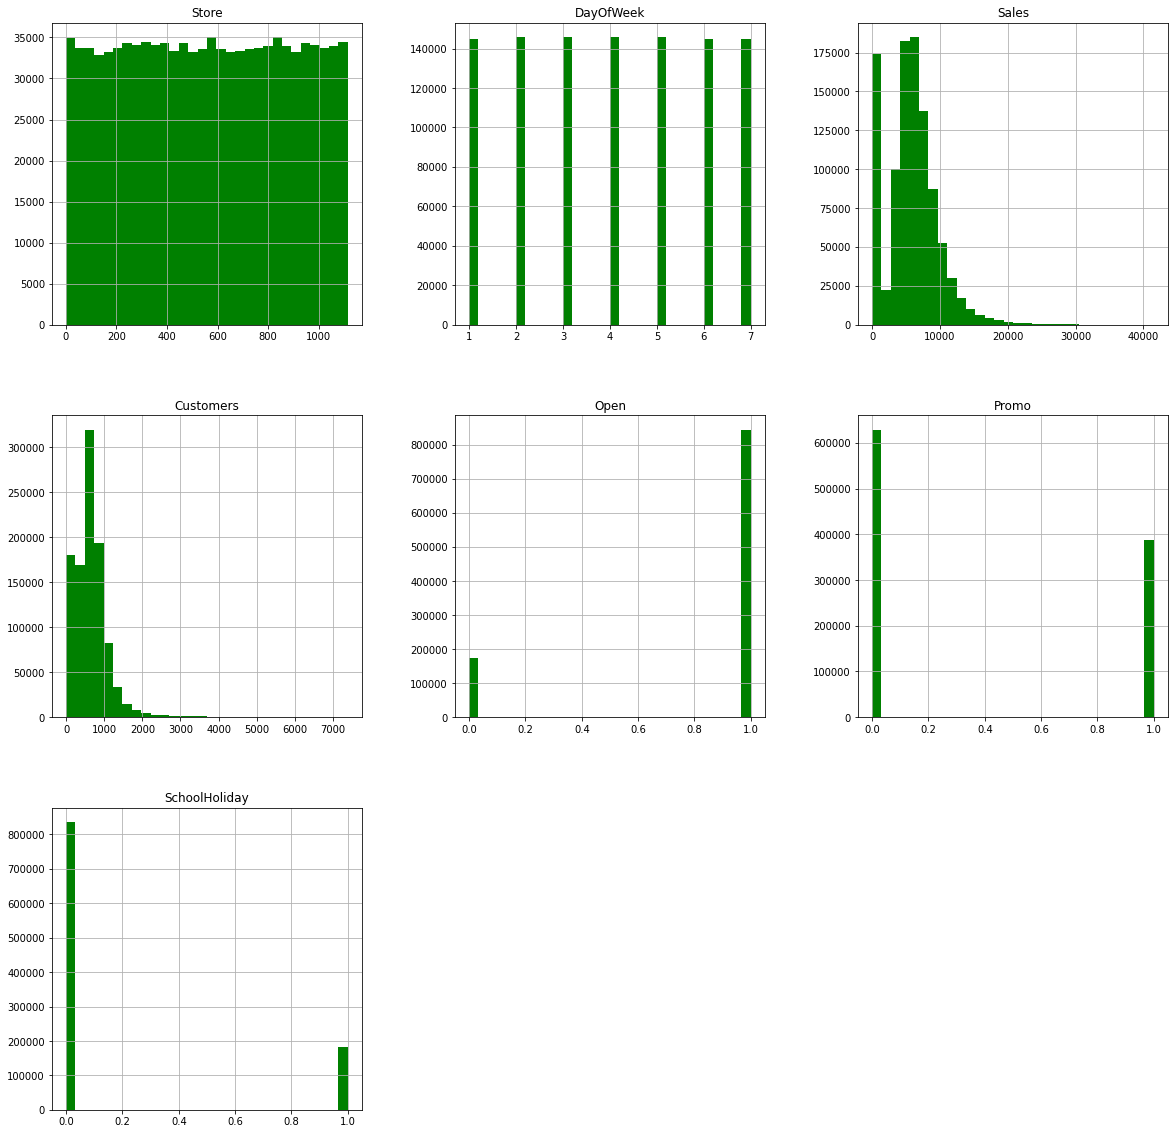

In [18]:
sales_train_df.hist(bins=30, figsize=(20,20), color='green')
plt.show()

- Temos as mesmas quantidades de dias da semanas, muito mais dados de escola com dia normal de aula. As lojas pareecem fazer por volta de 50% de promoção dado o total de dias sem promoção. 

### Dias aberta X Dias fechada

Separando os dados de quando a loja estava aberta e de quando ela estava fechada, pois nos dias em que a loja estava fechada, a mesma não obteve lucro, nem clientes.

In [19]:
closed_df = sales_train_df[sales_train_df['Open'] == 0]
open_df = sales_train_df[sales_train_df['Open'] == 1]

In [22]:
print('Total de dias observados das lojas:', len(sales_train_df))
print('Número de dias que a loja ficou fechadas:', len(closed_df))
print('Número de dias que loja ficou abertas:', len(open_df))
print('Médias geral de dias que a loja ficou fechada, dado o total de lojas: ', len(closed_df)/ len(store_df) )

Total de dias observados das lojas: 1017209
Número de dias que a loja ficou fechadas: 172817
Número de dias que loja ficou abertas: 844392
Médias geral de dias que a loja ficou fechada, dado o total de lojas:  154.99282511210762


In [23]:
closed_df.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
291,292,5,2015-07-31,0,0,0,1,0,1
875,876,5,2015-07-31,0,0,0,1,0,1
1406,292,4,2015-07-30,0,0,0,1,0,1
1990,876,4,2015-07-30,0,0,0,1,0,1
2521,292,3,2015-07-29,0,0,0,1,0,1


- Redefinindo o DataFrame para usar somente dados de quando a loja estava aberta, uma vez que quando a loja fecha, ela não tem lucro e nem clientes.

In [24]:
sales_train_df = open_df.drop(['Open'], axis=1)
sales_train_df.head()

,Store,DayOfWeek,Date,Sales,Customers,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,0,1
1,2,5,2015-07-31,6064,625,1,0,1
2,3,5,2015-07-31,8314,821,1,0,1
3,4,5,2015-07-31,13995,1498,1,0,1
4,5,5,2015-07-31,4822,559,1,0,1


### Sumário estatístico

Verificando o pontêncial de venda da loja, considerando somente qquando a mesta está aberta, já que agora, não está diminuída de quando a loja estava fechada.

In [25]:
sales_train_df.describe()

,Store,DayOfWeek,Sales,Customers,Promo,SchoolHoliday
count,844392.000000,844392.000000,844392.000000,844392.000000,844392.000000,844392.000000
mean,558.422920,3.520361,6955.514291,762.728395,0.446352,0.193580
std,321.731914,1.723689,3104.214680,401.227674,0.497114,0.395103
min,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,280.000000,2.000000,4859.000000,519.000000,0.000000,0.000000
50%,558.000000,3.000000,6369.000000,676.000000,0.000000,0.000000
75%,837.000000,5.000000,8360.000000,893.000000,1.000000,0.000000
max,1115.000000,7.000000,41551.000000,7388.000000,1.000000,1.000000


## Dataframe das Lojas

### Dados Nulos

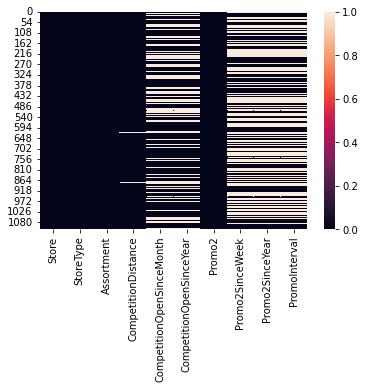

In [26]:
sns.heatmap(store_df.isnull());

In [27]:
store_df.isnull().sum()

Store                          0
StoreType                      0
Assortment                     0
CompetitionDistance            3
CompetitionOpenSinceMonth    354
CompetitionOpenSinceYear     354
Promo2                         0
Promo2SinceWeek              544
Promo2SinceYear              544
PromoInterval                544
dtype: int64

#### Analisando os dados nulos

- A distância para o competidor mais próximo

In [28]:
store_df[store_df['CompetitionDistance'].isnull()]

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
290,291,d,a,NaN,NaN,NaN,0,NaN,NaN,NaN
621,622,a,c,NaN,NaN,NaN,0,NaN,NaN,NaN
878,879,d,a,NaN,NaN,NaN,1,5.0,2013.0,"Feb,May,Aug,Nov"


- A data em que o competidor foi aberto
- Podemos notar que, se não tem a data do mês em que ele foi aberto, também não teremos o ano em que o competidor foi aberto

In [29]:
store_df[store_df['CompetitionOpenSinceMonth'].isnull()]

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
11,12,a,c,1070.0,NaN,NaN,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
12,13,d,a,310.0,NaN,NaN,1,45.0,2009.0,"Feb,May,Aug,Nov"
15,16,a,c,3270.0,NaN,NaN,0,NaN,NaN,NaN
18,19,a,c,3240.0,NaN,NaN,1,22.0,2011.0,"Mar,Jun,Sept,Dec"
21,22,a,a,1040.0,NaN,NaN,1,22.0,2012.0,"Jan,Apr,Jul,Oct"
...,...,...,...,...,...,...,...,...,...,...
1095,1096,a,c,1130.0,NaN,NaN,1,10.0,2014.0,"Mar,Jun,Sept,Dec"
1099,1100,a,a,540.0,NaN,NaN,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
1112,1113,a,c,9260.0,NaN,NaN,0,NaN,NaN,NaN
1113,1114,a,c,870.0,NaN,NaN,0,NaN,NaN,NaN


In [30]:
store_df[store_df['CompetitionOpenSinceYear'].isnull()]

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
11,12,a,c,1070.0,NaN,NaN,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
12,13,d,a,310.0,NaN,NaN,1,45.0,2009.0,"Feb,May,Aug,Nov"
15,16,a,c,3270.0,NaN,NaN,0,NaN,NaN,NaN
18,19,a,c,3240.0,NaN,NaN,1,22.0,2011.0,"Mar,Jun,Sept,Dec"
21,22,a,a,1040.0,NaN,NaN,1,22.0,2012.0,"Jan,Apr,Jul,Oct"
...,...,...,...,...,...,...,...,...,...,...
1095,1096,a,c,1130.0,NaN,NaN,1,10.0,2014.0,"Mar,Jun,Sept,Dec"
1099,1100,a,a,540.0,NaN,NaN,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
1112,1113,a,c,9260.0,NaN,NaN,0,NaN,NaN,NaN
1113,1114,a,c,870.0,NaN,NaN,0,NaN,NaN,NaN


- Quando não temos promoção, logicamente, não teremos as datas em que a promoção ocorreu!

In [31]:
store_df[store_df['Promo2']==0]

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN
5,6,a,a,310.0,12.0,2013.0,0,NaN,NaN,NaN
6,7,a,c,24000.0,4.0,2013.0,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
1107,1108,a,a,540.0,4.0,2004.0,0,NaN,NaN,NaN
1109,1110,c,c,900.0,9.0,2010.0,0,NaN,NaN,NaN
1111,1112,c,c,1880.0,4.0,2006.0,0,NaN,NaN,NaN
1112,1113,a,c,9260.0,NaN,NaN,0,NaN,NaN,NaN


#### Tratando dados nulos

Não podemos modificar os dados de datas com a média, pois não faz sentido, então, neste caso iremos apenas zerar estas colunas.

In [32]:
str_cols = [
  'CompetitionOpenSinceMonth',
  'CompetitionOpenSinceYear',
  'Promo2SinceWeek',
  'Promo2SinceYear',
  'PromoInterval'
]

for col in str_cols:
  store_df[col].fillna(0, inplace=True)

store_df.isnull().sum()

Store                        0
StoreType                    0
Assortment                   0
CompetitionDistance          3
CompetitionOpenSinceMonth    0
CompetitionOpenSinceYear     0
Promo2                       0
Promo2SinceWeek              0
Promo2SinceYear              0
PromoInterval                0
dtype: int64

- Podemos também substituir a distância dos concorretes para a média das distâncias.

In [33]:
store_df['CompetitionDistance'].fillna(store_df['CompetitionDistance'].mean(), inplace=True)
store_df.isnull().sum()

Store                        0
StoreType                    0
Assortment                   0
CompetitionDistance          0
CompetitionOpenSinceMonth    0
CompetitionOpenSinceYear     0
Promo2                       0
Promo2SinceWeek              0
Promo2SinceYear              0
PromoInterval                0
dtype: int64

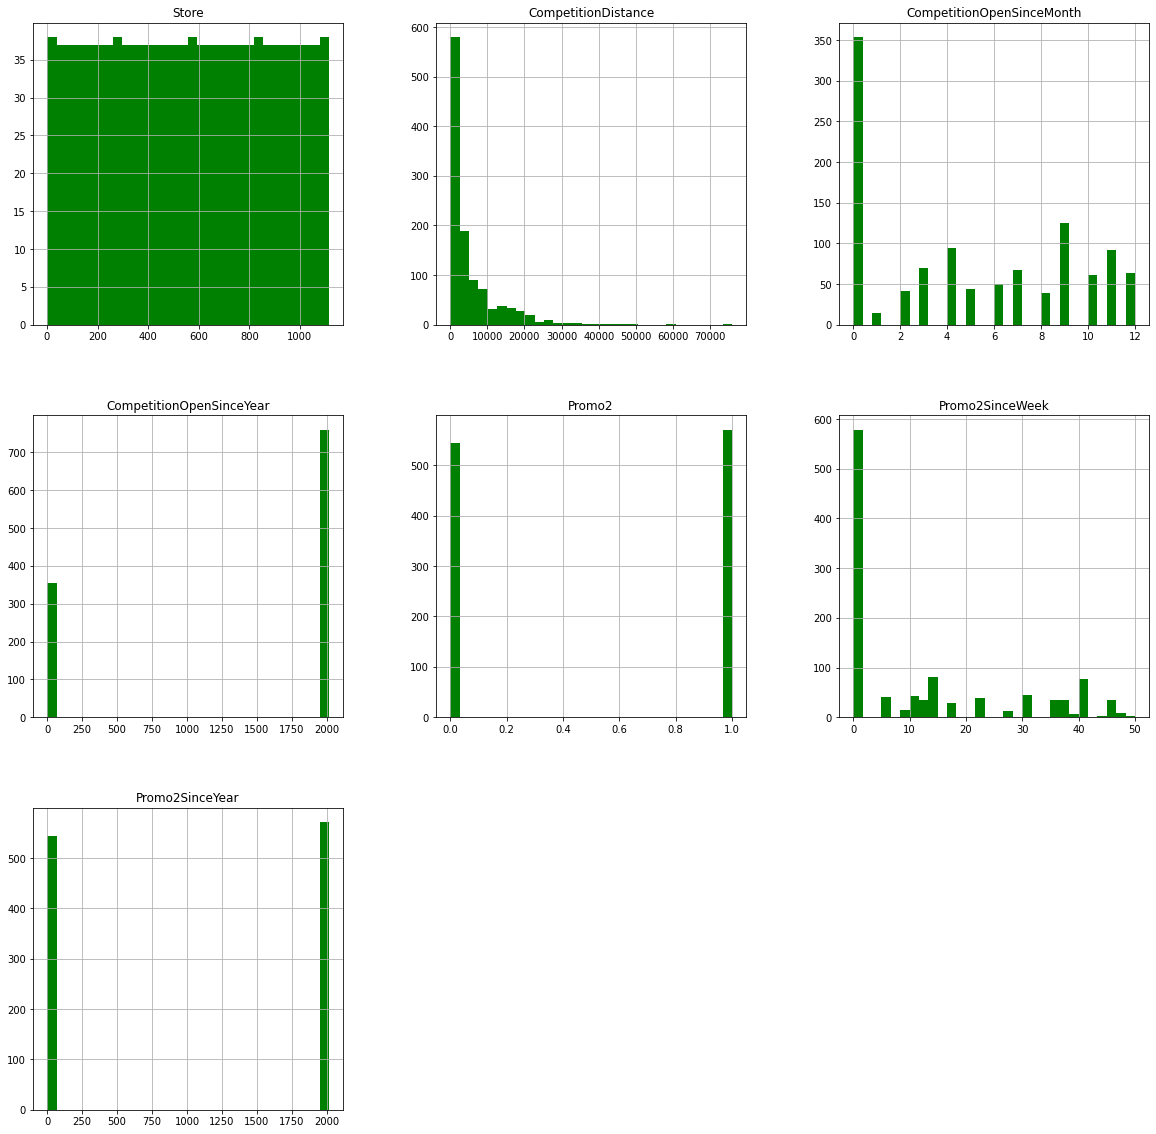

In [35]:
store_df.hist(bins=30, figsize=(20,20), color='green');

# Unindo os dataframes

mesclando os dados de venda por dia, com os dados de localização das lojas.

In [37]:
sales_store_df = pd.merge(sales_train_df, store_df, how="inner", on = 'Store') # inner_join
sales_store_df

,Store,DayOfWeek,Date,Sales,Customers,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,2015-07-31,5263,555,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0
1,1,4,2015-07-30,5020,546,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0
2,1,3,2015-07-29,4782,523,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0
3,1,2,2015-07-28,5011,560,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0
4,1,1,2015-07-27,6102,612,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
844387,292,1,2013-01-07,9291,1002,1,0,0,a,a,1100.0,6.0,2009.0,0,0.0,0.0,0
844388,292,6,2013-01-05,2748,340,0,0,0,a,a,1100.0,6.0,2009.0,0,0.0,0.0,0
844389,292,5,2013-01-04,4202,560,0,0,1,a,a,1100.0,6.0,2009.0,0,0.0,0.0,0
844390,292,4,2013-01-03,4580,662,0,0,1,a,a,1100.0,6.0,2009.0,0,0.0,0.0,0


# Correlação entre os dados

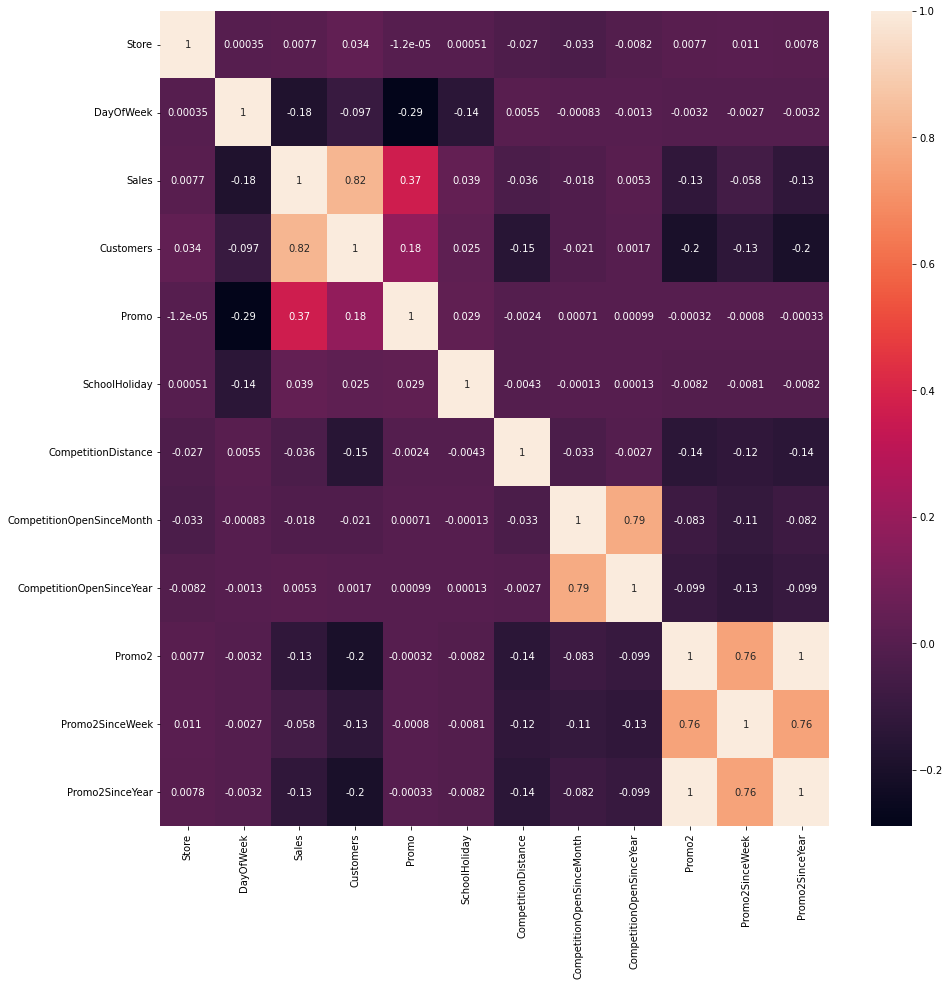

In [38]:
correlations = sales_store_df.corr()
f, ax = plt.subplots(figsize = (15, 15))
sns.heatmap(correlations, annot=True)

- A promoção 2 não reflete o número maior de clientes ou de vendas. Ao contrário, tem uma correlação negativa.
- O número de clientes está correlacionado com o o lucro das vendas
- O número de clientes está correlacionado com a promoção
- O dia da semana tem uma correlação negativa fraca com o valor das vendas

In [39]:
correlation = sales_store_df.corr()['Sales'].sort_values() 
correlations

,Store,DayOfWeek,Sales,Customers,Promo,SchoolHoliday,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear
Store,1.000000,0.000346,0.007710,0.033977,-0.000012,0.000512,-0.027031,-0.032555,-0.008152,0.007736,0.010857,0.007768
DayOfWeek,0.000346,1.000000,-0.178736,-0.097266,-0.289265,-0.139315,0.005528,-0.000834,-0.001303,-0.003241,-0.002736,-0.003238
Sales,0.007710,-0.178736,1.000000,0.823597,0.368145,0.038617,-0.036343,-0.018370,0.005266,-0.127596,-0.058476,-0.127621
Customers,0.033977,-0.097266,0.823597,1.000000,0.182846,0.024902,-0.148362,-0.021006,0.001666,-0.202232,-0.130841,-0.202204
Promo,-0.000012,-0.289265,0.368145,0.182846,1.000000,0.028964,-0.002390,0.000711,0.000990,-0.000324,-0.000802,-0.000326
SchoolHoliday,0.000512,-0.139315,0.038617,0.024902,0.028964,1.000000,-0.004274,-0.000131,0.000126,-0.008245,-0.008062,-0.008248
CompetitionDistance,-0.027031,0.005528,-0.036343,-0.148362,-0.002390,-0.004274,1.000000,-0.033264,-0.002713,-0.141784,-0.124703,-0.141847
CompetitionOpenSinceMonth,-0.032555,-0.000834,-0.018370,-0.021006,0.000711,-0.000131,-0.033264,1.000000,0.785326,-0.082561,-0.109522,-0.082488
CompetitionOpenSinceYear,-0.008152,-0.001303,0.005266,0.001666,0.000990,0.000126,-0.002713,0.785326,1.000000,-0.098571,-0.125080,-0.098503
Promo2,0.007736,-0.003241,-0.127596,-0.202232,-0.000324,-0.008245,-0.141784,-0.082561,-0.098571,1.000000,0.759523,0.999999


# Analisando as componentes das datas

Separando o ano, mês e dia

In [40]:
sales_store_df['year'] = pd.DatetimeIndex(sales_store_df['Date']).year
sales_store_df['month'] = pd.DatetimeIndex(sales_store_df['Date']).month
sales_store_df['day'] = pd.DatetimeIndex(sales_store_df['Date']).day
sales_store_df.head()

,Store,DayOfWeek,Date,Sales,Customers,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,year,month,day
0,1,5,2015-07-31,5263,555,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0,2015,7,31
1,1,4,2015-07-30,5020,546,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0,2015,7,30
2,1,3,2015-07-29,4782,523,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0,2015,7,29
3,1,2,2015-07-28,5011,560,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0,2015,7,28
4,1,1,2015-07-27,6102,612,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0,2015,7,27


Text(0.5, 1.0, 'Média de vendas por mês')

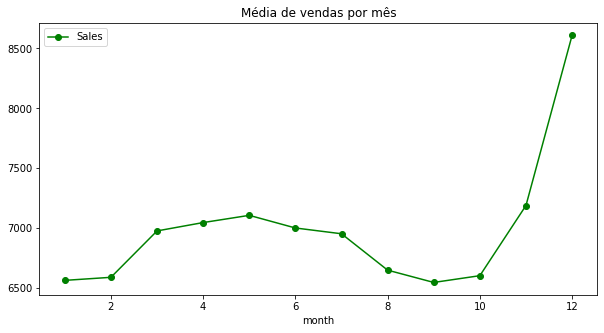

In [41]:
axis = sales_store_df.groupby('month')[['Sales']].mean().plot(figsize = (10,5), marker = 'o', color='green')
axis.set_title("Média de vendas por mês")

Text(0.5, 1.0, 'Média de clientes por mês')

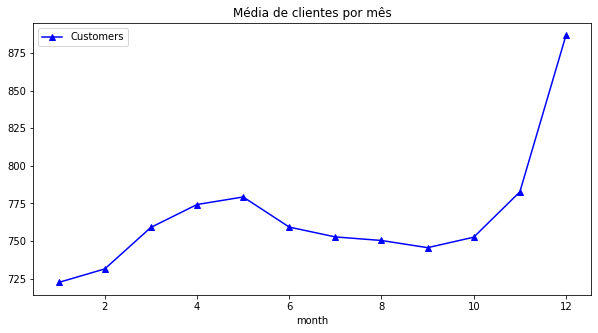

In [42]:
axis = sales_store_df.groupby('month')[['Customers']].mean().plot(figsize = (10,5), marker = '^', color='b')
axis.set_title("Média de clientes por mês")

- Podemos notar que os meses 3,4, 5, 10, 11 e 12, com destaque maior para final de ano. Tsemos maior volume de montante arrecadado e clientes.

Text(0.5, 1.0, 'Média de vendas por dia')

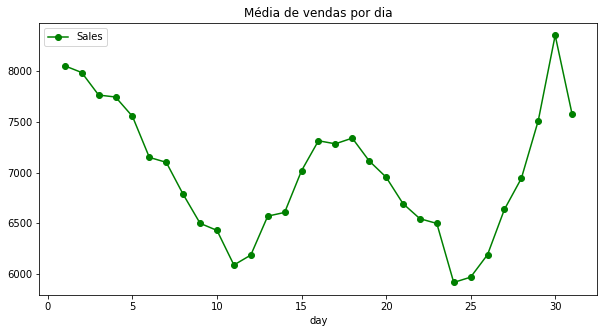

In [43]:
axis = sales_store_df.groupby('day')[['Sales']].mean().plot(figsize = (10,5), marker = 'o', color='green')
axis.set_title("Média de vendas por dia")

Text(0.5, 1.0, 'Média de clientes por dia')

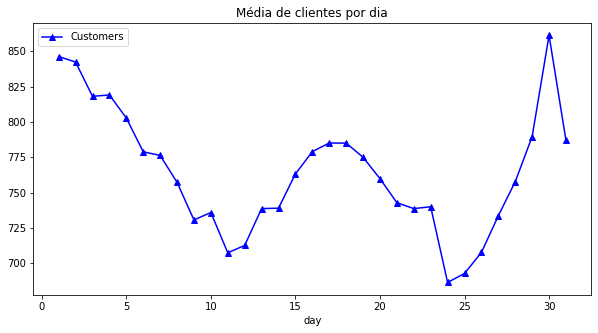

In [44]:
axis = sales_store_df.groupby('day')[['Customers']].mean().plot(figsize = (10,5), marker = '^', color='b')
axis.set_title("Média de clientes por dia")

- Importante destacar a queda de clientes do inicio do mês que se extente até o dia 10, além da queda do dia 22-23 até o dia 25 do mês. 

Text(0.5, 1.0, 'Média de vendas por semana')

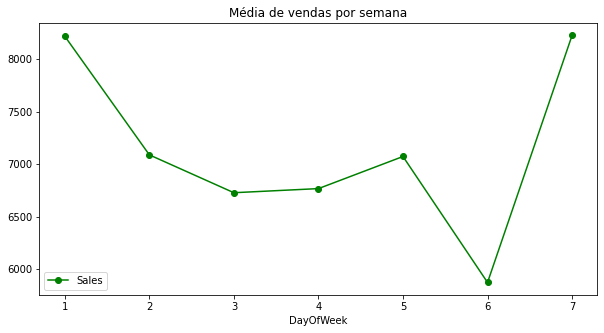

In [45]:
axis = sales_store_df.groupby('DayOfWeek')[['Sales']].mean().plot(figsize = (10,5), marker = 'o', color='green')
axis.set_title("Média de vendas por semana")

Text(0.5, 1.0, 'Média de clientes por semana')

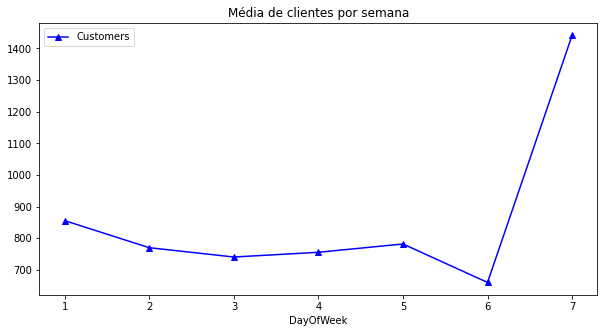

In [46]:
axis = sales_store_df.groupby('DayOfWeek')[['Customers']].mean().plot(figsize = (10,5), marker = '^', color='b')
axis.set_title("Média de clientes por semana")

- Importante notar a queda de clientes aos sábados e o grande aumento de clientes no domingo.

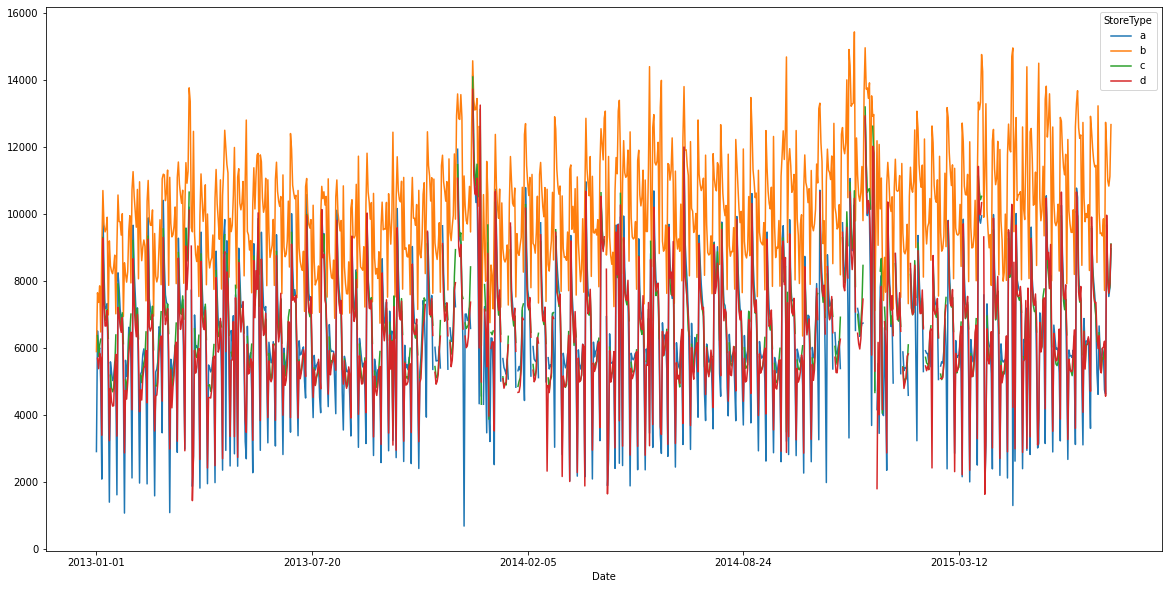

In [47]:
fig, ax = plt.subplots(figsize = (20,10))
sales_store_df.groupby(['Date', 'StoreType']).mean()['Sales'].unstack().plot(ax=ax)

- Podemos notar que a classe da loja influencia no pico e vale dos lucros das lojas.

- Analisando as venda média com e sem promoção.

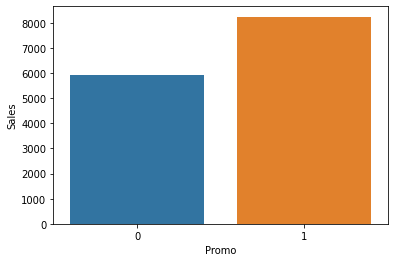

In [ ]:
sns.barplot(x='Promo', y='Sales', data=sales_store_df);

- Analisando a quantidade de clientes com e sem promoção.

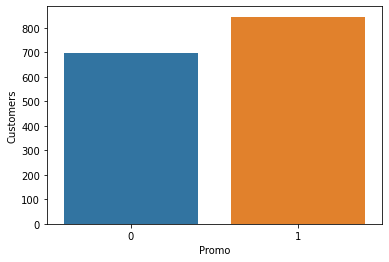

In [ ]:
sns.barplot(x='Promo', y='Customers', data=sales_store_df);

# Facebook Prophet

In [ ]:
!pip install fbprophet

In [51]:
from fbprophet import Prophet

- Para trabalharmos com o FBProphet necessitamos renomar a coluna com as datas para `ds` e a coluna alvo, que no caso são as vendas, para `y`.

In [52]:
def sales_predictor(store_id, sales_df, periods):
  sales_df = sales_df[sales_df['Store']==store_id]
  sales_df = sales_df[['Date', 'Sales']].rename(columns = {'Date': 'ds', 'Sales': 'y'})
  sales_df = sales_df.sort_values(by='ds') # ordenar por data

  model = Prophet()
  model.fit(sales_df) # Ajustando o modelo aos dados

  future = model.make_future_dataframe(periods=periods) # Prevendo x períodos no futuro
  forecast = model.predict(future)

  # Exibindo os gráficos
  figure = model.plot(forecast, xlabel = 'Data', ylabel = 'Vendas')
  figure_ = model.plot_components(forecast)

  return sales_df, forecast


## Previsão

- prevendo 60 dias de vendas da loja 10.
- O FBProphet retorna o dataframe com x períodos a mais de dias, que são as previsões (no exemplo abaixo, são as frequências com ausência de pontos)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


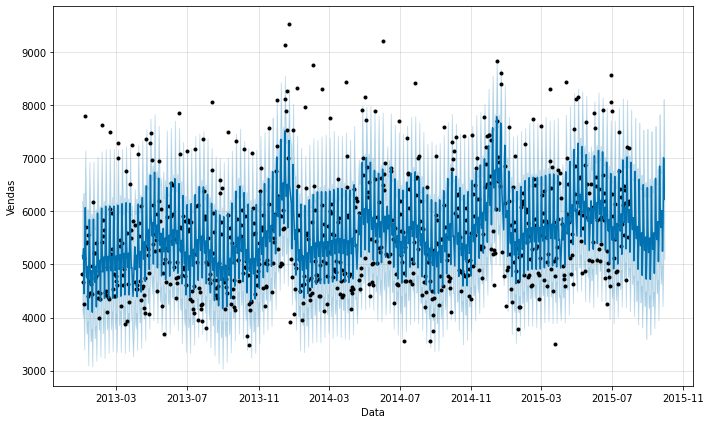

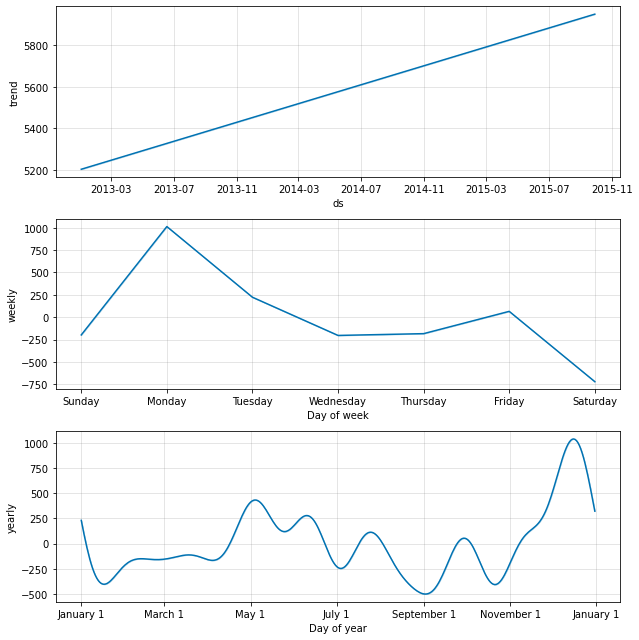

In [ ]:
df_origin, df_predictions = sales_predictor(10, sales_store_df, 60); 

In [ ]:
df_origin.head()

,ds,y
7819,2013-01-02,4812
7818,2013-01-03,4675
7817,2013-01-04,5114
7816,2013-01-05,4256
7815,2013-01-07,7804


In [ ]:
df_predictions.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2013-01-02,5204.484727,4122.598103,6197.687776,5204.484727,5204.484727,-44.077962,-44.077962,-44.077962,-203.046067,-203.046067,-203.046067,158.968105,158.968105,158.968105,0.0,0.0,0.0,5160.406765
1,2013-01-03,5205.228405,4014.402713,6084.813647,5205.228405,5205.228405,-93.232653,-93.232653,-93.232653,-183.012971,-183.012971,-183.012971,89.780317,89.780317,89.780317,0.0,0.0,0.0,5111.995752
2,2013-01-04,5205.972083,4245.997322,6347.335576,5205.972083,5205.972083,89.471792,89.471792,89.471792,65.942825,65.942825,65.942825,23.528967,23.528967,23.528967,0.0,0.0,0.0,5295.443875
3,2013-01-05,5206.715761,3397.702637,5467.013291,5206.715761,5206.715761,-758.331393,-758.331393,-758.331393,-719.174286,-719.174286,-719.174286,-39.157107,-39.157107,-39.157107,0.0,0.0,0.0,4448.384368
4,2013-01-07,5208.203117,5068.698861,7147.152546,5208.203117,5208.203117,861.318599,861.318599,861.318599,1013.040634,1013.040634,1013.040634,-151.722034,-151.722034,-151.722034,0.0,0.0,0.0,6069.521716


### Previsão em 60 dias

In [ ]:
df_predictions.tail(60) # vendo as 60 últimas datas, que são as previsões

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
784,2015-08-01,5904.754320,4122.071121,6296.605294,5904.754320,5904.754320,-673.734983,-673.734983,-673.734983,-719.174286,-719.174286,-719.174286,45.439303,45.439303,45.439303,0.0,0.0,0.0,5231.019337
785,2015-08-02,5905.498641,4698.668293,6798.441380,5905.498641,5905.498641,-172.385687,-172.385687,-172.385687,-197.423916,-197.423916,-197.423916,25.038229,25.038229,25.038229,0.0,0.0,0.0,5733.112954
786,2015-08-03,5906.242962,5838.671095,7916.366703,5906.242962,5906.242962,1015.917486,1015.917486,1015.917486,1013.040634,1013.040634,1013.040634,2.876853,2.876853,2.876853,0.0,0.0,0.0,6922.160448
787,2015-08-04,5906.987283,4998.985022,7150.478807,5906.987283,5906.987283,202.989916,202.989916,202.989916,223.673781,223.673781,223.673781,-20.683865,-20.683865,-20.683865,0.0,0.0,0.0,6109.977199
788,2015-08-05,5907.731604,4627.172661,6695.019474,5907.731604,5907.731604,-248.332224,-248.332224,-248.332224,-203.046067,-203.046067,-203.046067,-45.286157,-45.286157,-45.286157,0.0,0.0,0.0,5659.399381
789,2015-08-06,5908.475925,4679.379973,6581.288919,5908.475925,5908.475925,-253.597221,-253.597221,-253.597221,-183.012971,-183.012971,-183.012971,-70.584250,-70.584250,-70.584250,0.0,0.0,0.0,5654.878705
790,2015-08-07,5909.220246,4789.371039,6896.244038,5909.220246,5909.220246,-30.309420,-30.309420,-30.309420,65.942825,65.942825,65.942825,-96.252245,-96.252245,-96.252245,0.0,0.0,0.0,5878.910826
791,2015-08-08,5909.964567,4026.502570,6096.615344,5909.964561,5909.964567,-841.165148,-841.165148,-841.165148,-719.174286,-719.174286,-719.174286,-121.990862,-121.990862,-121.990862,0.0,0.0,0.0,5068.799419
792,2015-08-09,5910.708888,4490.234404,6567.481618,5910.708872,5910.708894,-344.956807,-344.956807,-344.956807,-197.423916,-197.423916,-197.423916,-147.532891,-147.532891,-147.532891,0.0,0.0,0.0,5565.752082
793,2015-08-10,5911.453209,5663.983823,7759.243432,5911.453177,5911.453230,840.393413,840.393413,840.393413,1013.040634,1013.040634,1013.040634,-172.647221,-172.647221,-172.647221,0.0,0.0,0.0,6751.846622


### Salvando das previões

In [ ]:
df_predictions.tail(60).to_csv('previsoes_vendas.csv') # Salvando as previsões de vnadas em u mcsv

## Previsão com feriados

passando informações sobre feriados:
- StateHoliday e SchoolHoliday

In [ ]:
def sales_predictor_holidays(store_id, sales_df, holidays, periods):
  sales_df = sales_df[sales_df['Store']==store_id]
  sales_df = sales_df[['Date', 'Sales']].rename(columns = {'Date': 'ds', 'Sales': 'y'})
  sales_df = sales_df.sort_values(by='ds') # ordenar por data

  model = Prophet(holidays=holidays)
  model.fit(sales_df)

  future = model.make_future_dataframe(periods=periods)
  forecast = model.predict(future)
  
  figure = model.plot(forecast, xlabel = 'Data', ylabel = 'Vendas')
  figure_ = model.plot_components(forecast)

  return sales_df, forecast

### Feriados

- criar um array com as datas que devem ser consideradas feridados. 
- Não tem problema, repedir datas com o mesmo ferias, uma vez que o FBProphet é capaz de tratar datas repetidas.

##### Feriados escolares

- Selecionando todas as datas, em que ocorreram feriado escolar.

In [ ]:
school_holidays = sales_store_df[sales_store_df['SchoolHoliday']==1].loc[:'Date']['Date'].values
school_holidays.shape

(163457,)

- Quantidade de dias em que ocorreram feriados escolares, dado todas as datas, ou seja, tem vários anos de coleta.

In [ ]:
len(np.unique(school_holidays))

477

- Para peparar, temos uqe converter o nparray em um dataframe, com a coluna de datas com nome de `ds` e a coluna `holiday` com o nome do feriado.

In [ ]:
school_holidays = pd.DataFrame({'ds': pd.to_datetime(school_holidays),
                               'holiday':'school_holiday'
                               })
school_holidays

,ds,holiday
0,2015-07-31,school_holiday
1,2015-07-30,school_holiday
2,2015-07-29,school_holiday
3,2015-07-28,school_holiday
4,2015-07-27,school_holiday
...,...,...
163452,2013-02-05,school_holiday
163453,2013-02-04,school_holiday
163454,2013-01-04,school_holiday
163455,2013-01-03,school_holiday


##### Feriados Estaduais

- Selecionando todas as datas em que ocorreram feriados estaduais.

In [ ]:
state_holidays = sales_store_df[sales_store_df['StateHoliday'].isin(['a', 'b', 'c'])].loc[:'Date']['Date'].values
state_holidays.shape

(910,)

- Total de datas que em que ocorreram feriados do estado.

In [ ]:
len(np.unique(state_holidays)) # dias em que as escolas estavam fechadas

35

- Para peparar, temos uqe converter o nparray em um dataframe, com a coluna de datas com nome de `ds` e a coluna `holiday` com o nome do feriado.

In [ ]:
state_holidays = pd.DataFrame({'ds': pd.to_datetime(state_holidays),
                               'holiday':'state_holiday'
                               })
state_holidays

,ds,holiday
0,2014-10-03,state_holiday
1,2013-10-03,state_holiday
2,2015-06-04,state_holiday
3,2014-06-19,state_holiday
4,2013-05-30,state_holiday
...,...,...
905,2013-04-01,state_holiday
906,2013-08-15,state_holiday
907,2015-06-04,state_holiday
908,2014-06-19,state_holiday


##### Mesclando

- Mesclando todos os feriados

In [ ]:
holidays_df = pd.concat((state_holidays, school_holidays))
holidays_df.head()

,ds,holiday
0,2014-10-03,state_holiday
1,2013-10-03,state_holiday
2,2015-06-04,state_holiday
3,2014-06-19,state_holiday
4,2013-05-30,state_holiday


#### Prevendo

- Prever o lucro da loja 10 num período no futuro de 5 dias,

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


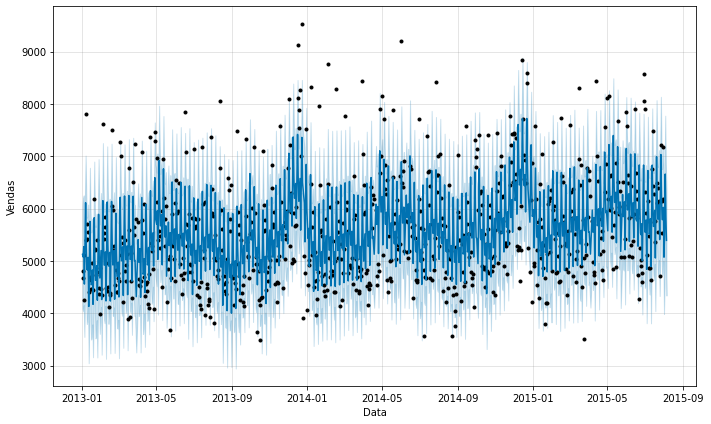

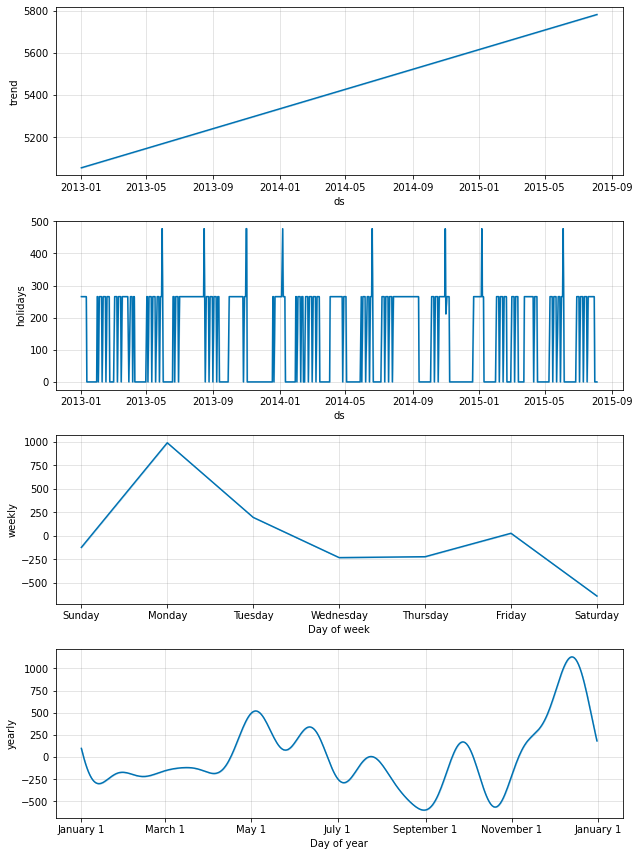

In [ ]:
df_original, df_prediction = sales_predictor_holidays(10, sales_store_df, holidays_df, 5)